<a href="https://colab.research.google.com/github/fjadidi2001/Insurance/blob/main/ClaimYNprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the dataset

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
# Load the dataset from Google Drive
file_path = '/content/drive/My Drive/Insurance/telematics_syn.csv'
df = pd.read_csv(file_path)

Mounted at /content/drive


In [3]:
df.head()

,Duration,Insured.age,Insured.sex,Car.age,Marital,Car.use,Credit.score,Region,Annual.miles.drive,Years.noclaims,...,Left.turn.intensity10,Left.turn.intensity11,Left.turn.intensity12,Right.turn.intensity08,Right.turn.intensity09,Right.turn.intensity10,Right.turn.intensity11,Right.turn.intensity12,NB_Claim,AMT_Claim
0,366,45,Male,-1,Married,Commute,609.0,Urban,6213.71,25,...,1.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,1,5100.171753
1,182,44,Female,3,Married,Commute,575.0,Urban,12427.42,20,...,58.0,24.0,11.0,1099.0,615.0,219.0,101.0,40.0,1,883.554840
2,184,48,Female,6,Married,Commute,847.0,Urban,12427.42,14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000000
3,183,71,Male,6,Married,Private,842.0,Urban,6213.71,43,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000000
4,183,84,Male,10,Married,Private,856.0,Urban,6213.71,65,...,2.0,0.0,0.0,325.0,111.0,18.0,4.0,2.0,0,0.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 52 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Duration                100000 non-null  int64  
 1   Insured.age             100000 non-null  int64  
 2   Insured.sex             100000 non-null  object 
 3   Car.age                 100000 non-null  int64  
 4   Marital                 100000 non-null  object 
 5   Car.use                 100000 non-null  object 
 6   Credit.score            100000 non-null  float64
 7   Region                  100000 non-null  object 
 8   Annual.miles.drive      100000 non-null  float64
 9   Years.noclaims          100000 non-null  int64  
 10  Territory               100000 non-null  int64  
 11  Annual.pct.driven       100000 non-null  float64
 12  Total.miles.driven      100000 non-null  float64
 13  Pct.drive.mon           100000 non-null  float64
 14  Pct.drive.tue        

# Step 2: Data Preprocessing


In [5]:
# Derive the target variable
df['ClaimYN'] = ((df['NB_Claim'] >= 1) & (df['AMT_Claim'] > 1000)).astype(int)

# Drop unnecessary columns
df = df.drop(['NB_Claim', 'AMT_Claim'], axis=1)

# Handle missing values (if any)
df = df.dropna()

# Encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Separate features and target variable
X = df.drop('ClaimYN', axis=1)
y = df['ClaimYN']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [6]:
df.head()

,Duration,Insured.age,Car.age,Credit.score,Annual.miles.drive,Years.noclaims,Territory,Annual.pct.driven,Total.miles.driven,Pct.drive.mon,...,Right.turn.intensity10,Right.turn.intensity11,Right.turn.intensity12,ClaimYN,Insured.sex_Male,Marital_Single,Car.use_Commute,Car.use_Farmer,Car.use_Private,Region_Urban
0,366,45,-1,609.0,6213.71,25,70,0.849315,8864.376247,0.148070,...,0.0,0.0,0.0,1,True,False,True,False,False,True
1,182,44,3,575.0,12427.42,20,26,0.465753,8092.308208,0.147686,...,219.0,101.0,40.0,0,False,False,True,False,False,True
2,184,48,6,847.0,12427.42,14,84,0.520548,3225.832512,0.153735,...,0.0,0.0,0.0,0,False,False,True,False,False,True
3,183,71,6,842.0,6213.71,43,30,0.065753,253.024528,0.106702,...,0.0,0.0,0.0,0,True,False,False,False,True,True
4,183,84,10,856.0,6213.71,65,70,0.441096,4374.379634,0.123807,...,18.0,4.0,2.0,0,True,False,False,False,True,True


In [7]:
# Access the 'ClaimYN' column from the DataFrame 'df'
df['ClaimYN'].describe()  # Use .describe() for distribution statistics

# Or, if you want the ClaimYN Series:
ClaimYN_series = df['ClaimYN']
ClaimYN_series.describe()

,ClaimYN
count,100000.000000
mean,0.026980
std,0.162026
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


# Step 3: Handle Class Imbalance


In [8]:
# Use SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Display class distribution after SMOTE
print("Class distribution after SMOTE:")
print(y_resampled.value_counts())


Class distribution after SMOTE:
ClaimYN
1    97302
0    97302
Name: count, dtype: int64


# Step 4: Create the model

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import seaborn as sns

# Split the resampled data
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

# Create a Gradient Boosting model (alternative to XGBoost)
gb_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

# Create a Neural Network model (alternative to TabNet)
nn_model = MLPClassifier(
    hidden_layer_sizes=(100, 50),
    activation='relu',
    solver='adam',
    max_iter=1000,
    random_state=42
)

# Train both models
gb_model.fit(X_train, y_train)
nn_model.fit(X_train, y_train)

# Make predictions using both models
gb_pred_proba = gb_model.predict_proba(X_test)[:, 1]
nn_pred_proba = nn_model.predict_proba(X_test)[:, 1]

# Combine predictions (simple average ensemble)
ensemble_pred_proba = (gb_pred_proba + nn_pred_proba) / 2
ensemble_predictions = (ensemble_pred_proba > 0.5).astype(int)



Gradient Boosting Performance Metrics:
Accuracy: 0.9561
Precision: 0.9597
Recall: 0.9528
F1 Score: 0.9562
AUC-ROC: 0.9919

Neural Network Performance Metrics:
Accuracy: 0.9852
Precision: 0.9750
Recall: 0.9961
F1 Score: 0.9855
AUC-ROC: 0.9948

Ensemble Performance Metrics:
Accuracy: 0.9882
Precision: 0.9788
Recall: 0.9982
F1 Score: 0.9884
AUC-ROC: 0.9991


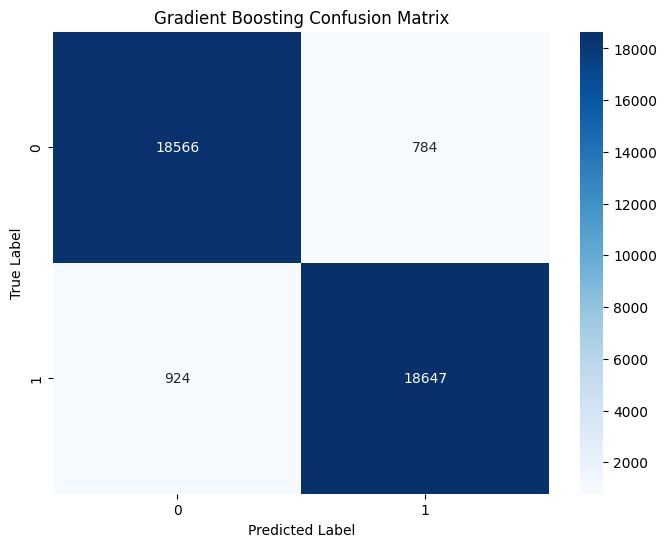

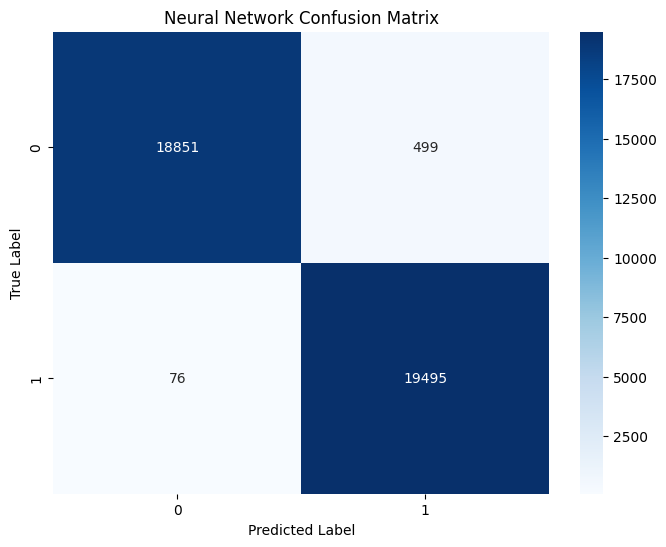

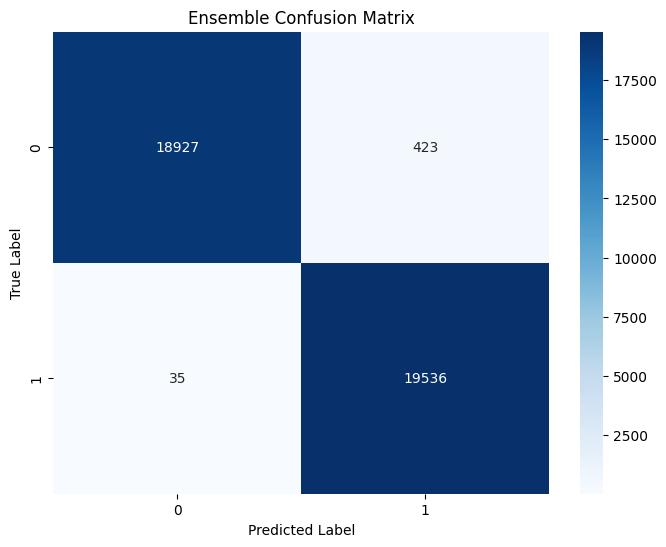

In [10]:
def evaluate_model(y_true, y_pred, y_pred_proba, model_name):
    """
    Evaluate model performance using multiple metrics
    """
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc_roc = roc_auc_score(y_true, y_pred_proba)

    print(f"\n{model_name} Performance Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC-ROC: {auc_roc:.4f}")

    return accuracy, precision, recall, f1, auc_roc

def plot_confusion_matrix(y_true, y_pred, model_name):
    """
    Plot confusion matrix
    """
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Evaluate individual models
gb_predictions = (gb_pred_proba > 0.5).astype(int)
nn_predictions = (nn_pred_proba > 0.5).astype(int)

# Evaluate all models
evaluate_model(y_test, gb_predictions, gb_pred_proba, "Gradient Boosting")
evaluate_model(y_test, nn_predictions, nn_pred_proba, "Neural Network")
evaluate_model(y_test, ensemble_predictions, ensemble_pred_proba, "Ensemble")

# Plot confusion matrices
plot_confusion_matrix(y_test, gb_predictions, "Gradient Boosting")
plot_confusion_matrix(y_test, nn_predictions, "Neural Network")
plot_confusion_matrix(y_test, ensemble_predictions, "Ensemble")



# Flowchart

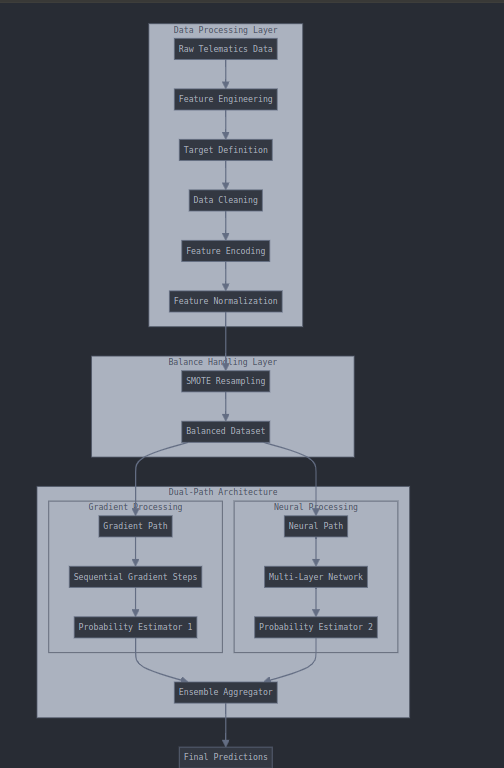

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, precision_recall_curve, average_precision_score
from sklearn.calibration import calibration_curve

def enhanced_model_evaluation(y_true, y_pred_proba, model_name):
    """
    Comprehensive model evaluation framework with advanced visualizations
    """
    # Create a figure with multiple subplots
    fig = plt.figure(figsize=(20, 12))

    # 1. ROC Curve
    ax1 = plt.subplot(231)
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    ax1.plot(fpr, tpr, label=f'ROC (AUC = {roc_auc_score(y_true, y_pred_proba):.3f})')
    ax1.plot([0, 1], [0, 1], 'k--')
    ax1.set_xlabel('False Positive Rate')
    ax1.set_ylabel('True Positive Rate')
    ax1.set_title('ROC Curve')
    ax1.legend()

    # 2. Precision-Recall Curve
    ax2 = plt.subplot(232)
    precision, recall, _ = precision_recall_curve(y_true, y_pred_proba)
    ap = average_precision_score(y_true, y_pred_proba)
    ax2.plot(recall, precision, label=f'PR (AP = {ap:.3f})')
    ax2.set_xlabel('Recall')
    ax2.set_ylabel('Precision')
    ax2.set_title('Precision-Recall Curve')
    ax2.legend()

    # 3. Model Calibration Plot
    ax3 = plt.subplot(233)
    prob_true, prob_pred = calibration_curve(y_true, y_pred_proba, n_bins=10)
    ax3.plot(prob_pred, prob_true, marker='o')
    ax3.plot([0, 1], [0, 1], 'k--')
    ax3.set_xlabel('Predicted Probability')
    ax3.set_ylabel('True Probability')
    ax3.set_title('Calibration Plot')

    # 4. Probability Distribution
    ax4 = plt.subplot(234)
    sns.kdeplot(data=y_pred_proba[y_true == 0], label='No Claim', ax=ax4)
    sns.kdeplot(data=y_pred_proba[y_true == 1], label='Claim', ax=ax4)
    ax4.set_xlabel('Predicted Probability')
    ax4.set_ylabel('Density')
    ax4.set_title('Prediction Distribution by Class')
    ax4.legend()

    # 5. Threshold Analysis
    ax5 = plt.subplot(235)
    thresholds = np.linspace(0, 1, 100)
    metrics = []
    for threshold in thresholds:
        y_pred = (y_pred_proba >= threshold).astype(int)
        precision = precision_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)
        metrics.append([precision, recall, f1])

    metrics = np.array(metrics)
    ax5.plot(thresholds, metrics[:, 0], label='Precision')
    ax5.plot(thresholds, metrics[:, 1], label='Recall')
    ax5.plot(thresholds, metrics[:, 2], label='F1')
    ax5.set_xlabel('Threshold')
    ax5.set_ylabel('Score')
    ax5.set_title('Threshold Impact Analysis')
    ax5.legend()

    # 6. Confusion Matrix with Percentages
    ax6 = plt.subplot(236)
    y_pred = (y_pred_proba >= 0.5).astype(int)
    cm = confusion_matrix(y_true, y_pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Blues', ax=ax6)
    ax6.set_xlabel('Predicted Label')
    ax6.set_ylabel('True Label')
    ax6.set_title('Normalized Confusion Matrix')

    plt.tight_layout()
    plt.suptitle(f'{model_name} Performance Analysis', y=1.02, fontsize=16)

    return fig

# Usage function for all models
def evaluate_all_models(y_test, gb_pred_proba, nn_pred_proba, ensemble_pred_proba):
    models = {
        'Gradient Path': gb_pred_proba,
        'Neural Path': nn_pred_proba,
        'Ensemble Model': ensemble_pred_proba
    }

    for model_name, pred_proba in models.items():
        fig = enhanced_model_evaluation(y_test, pred_proba, model_name)
        plt.show()

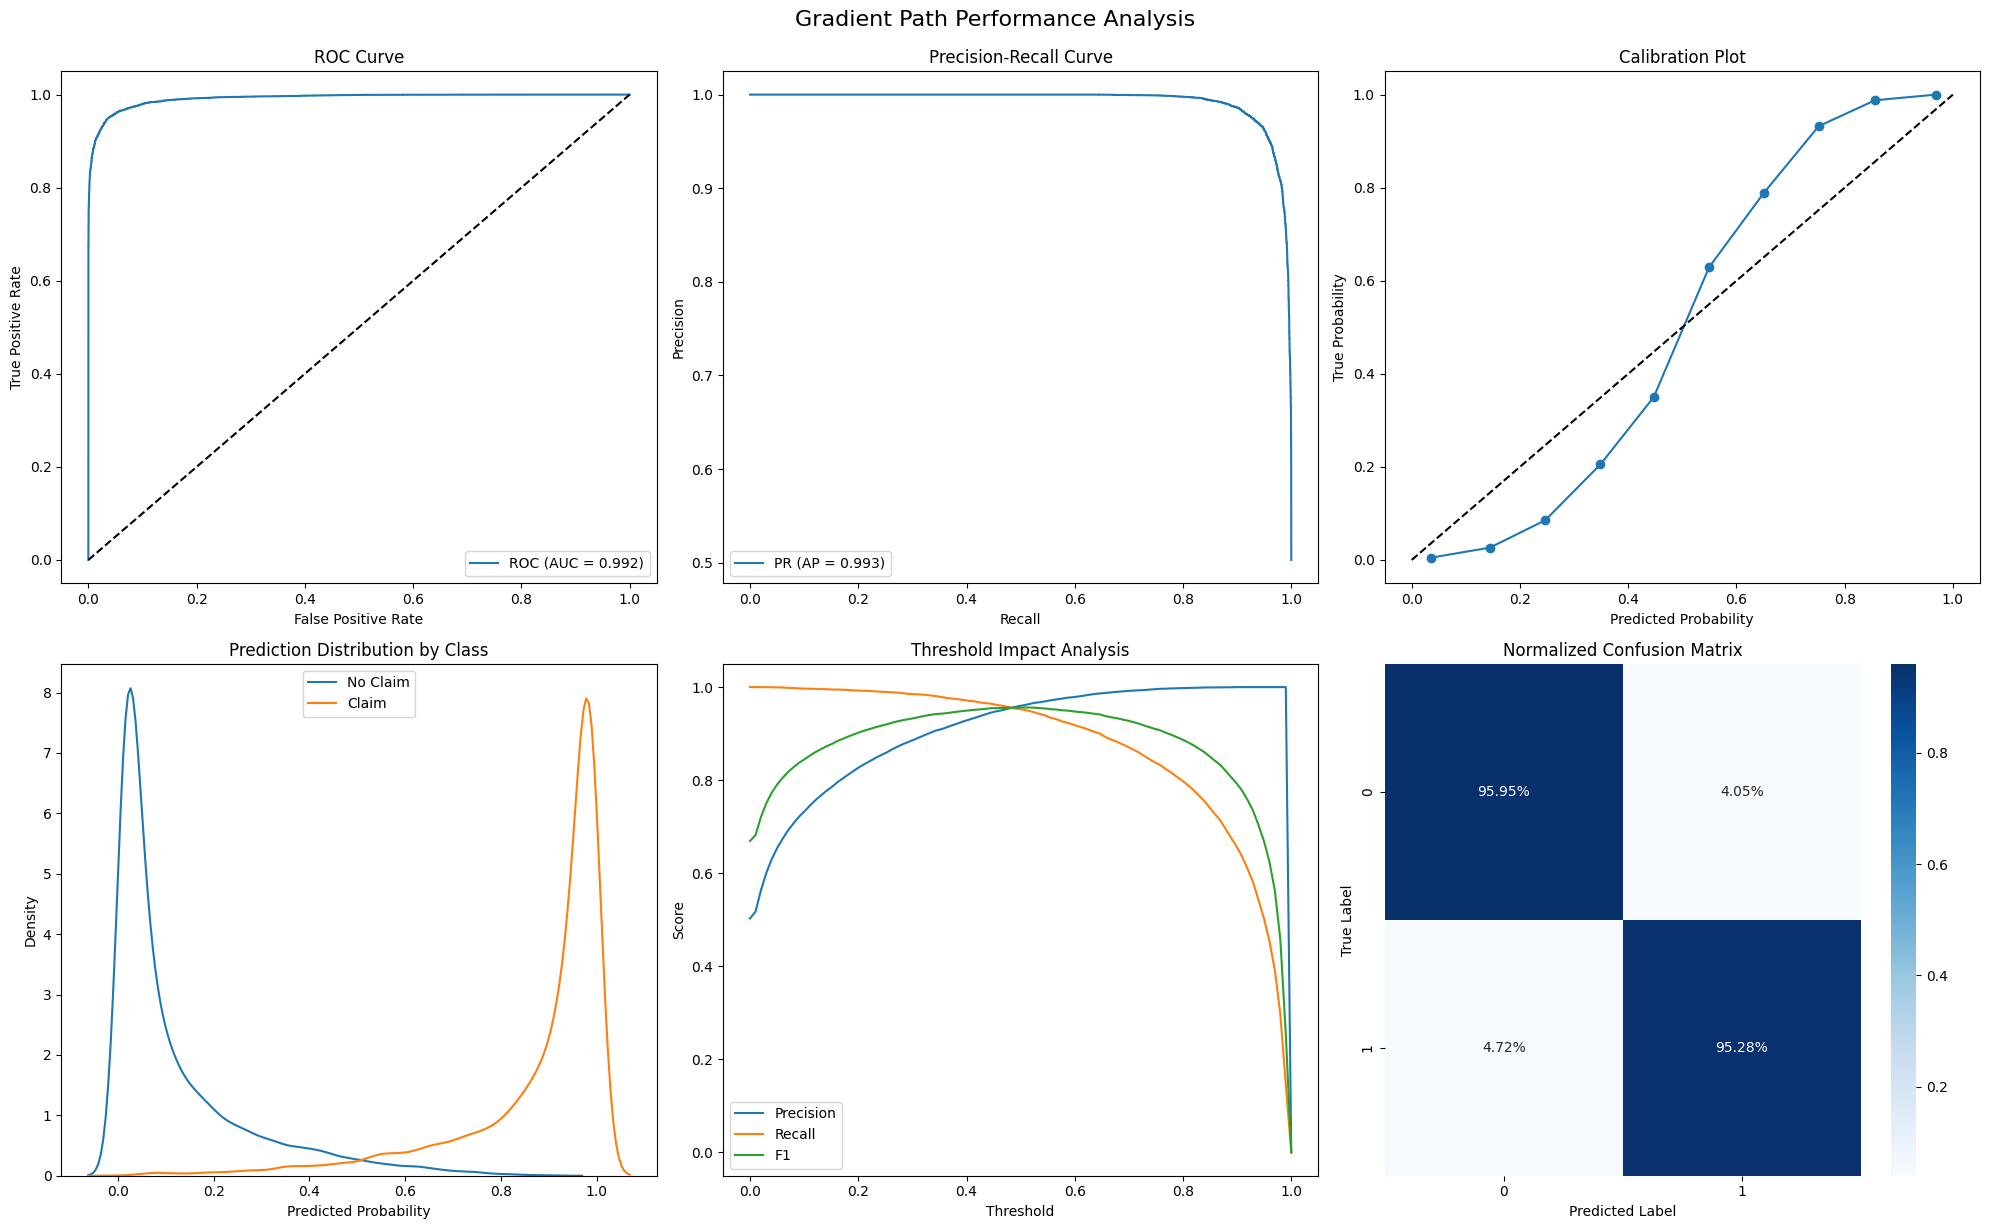

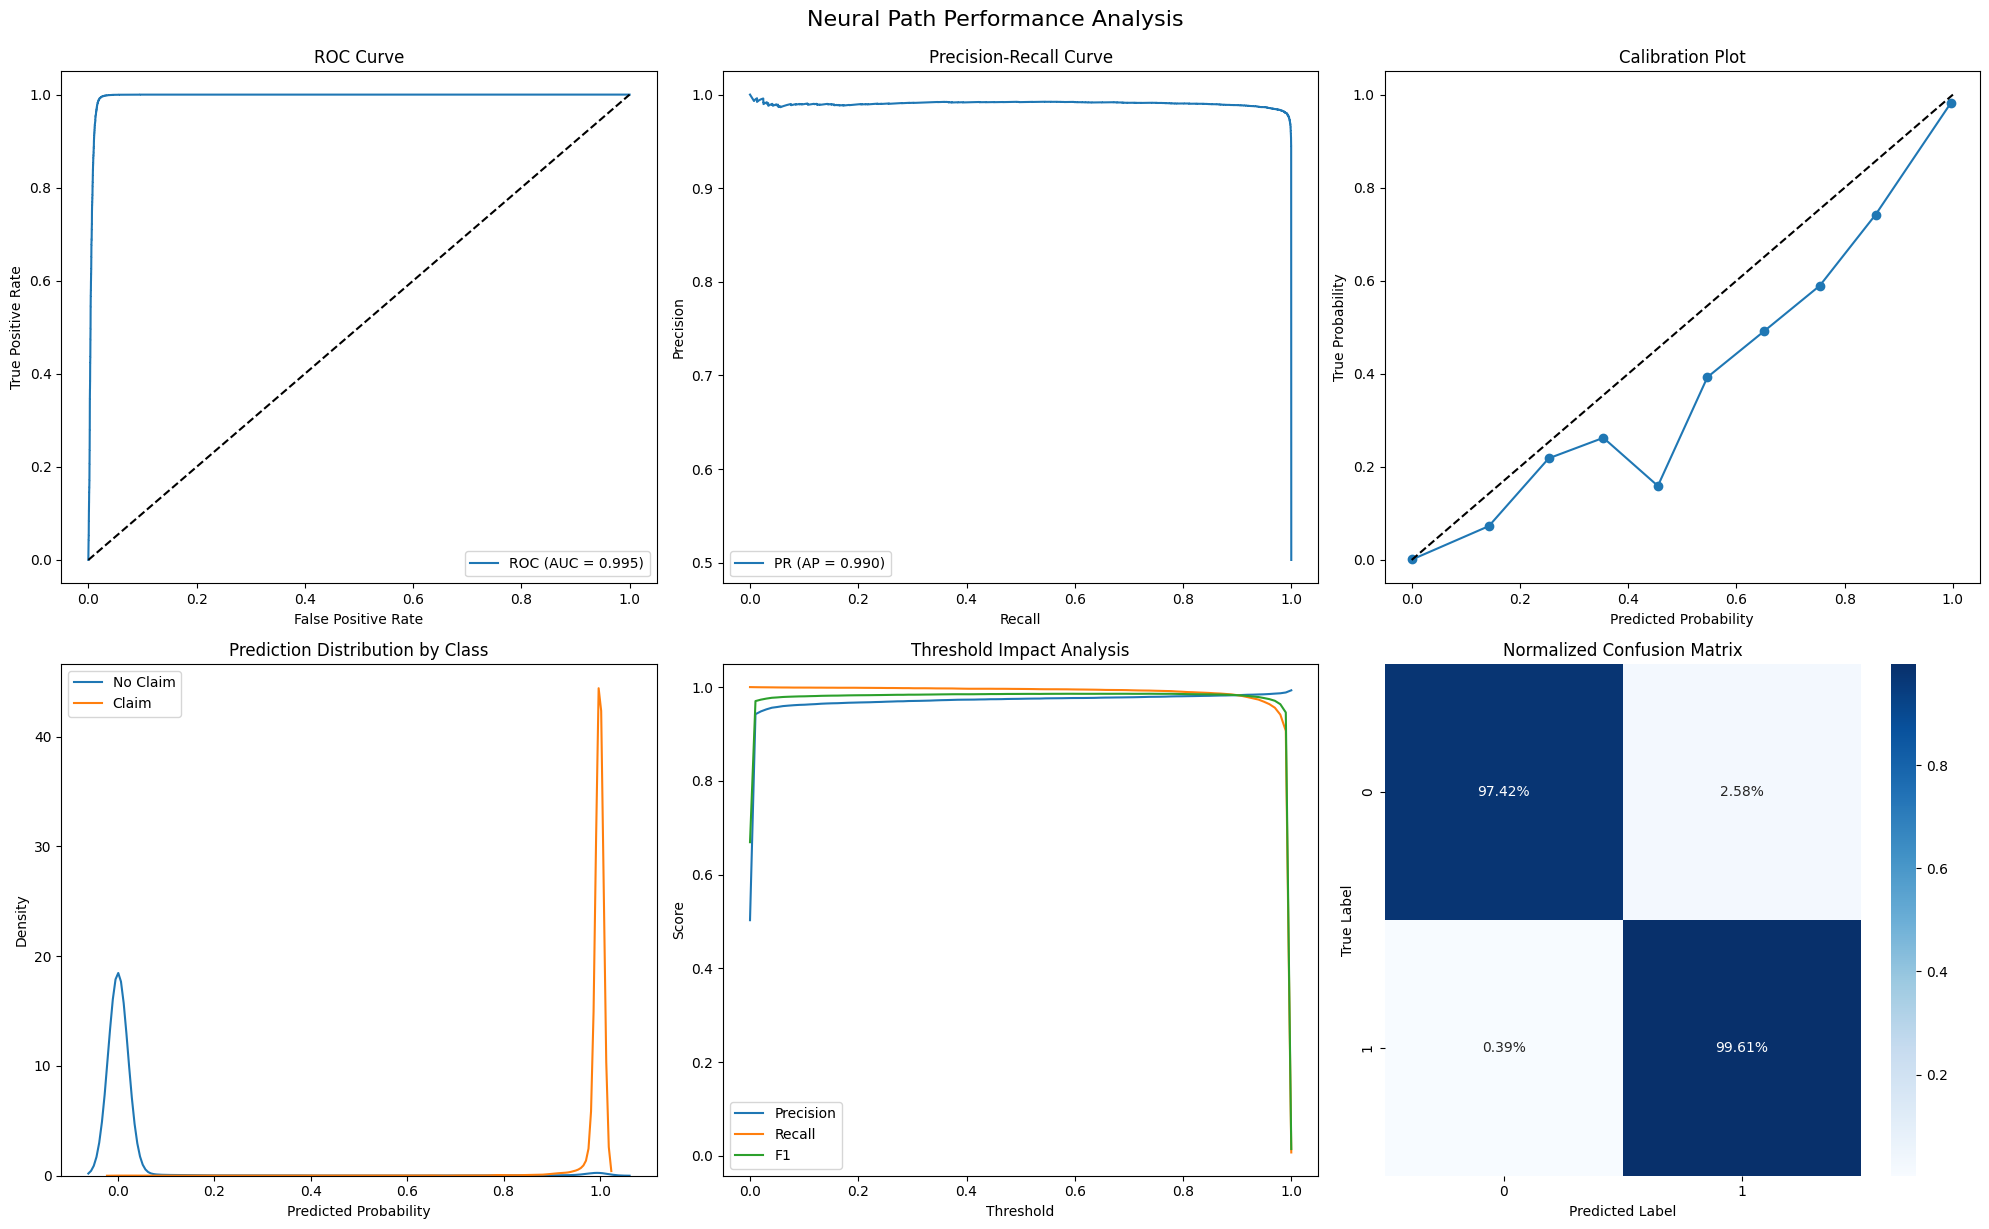

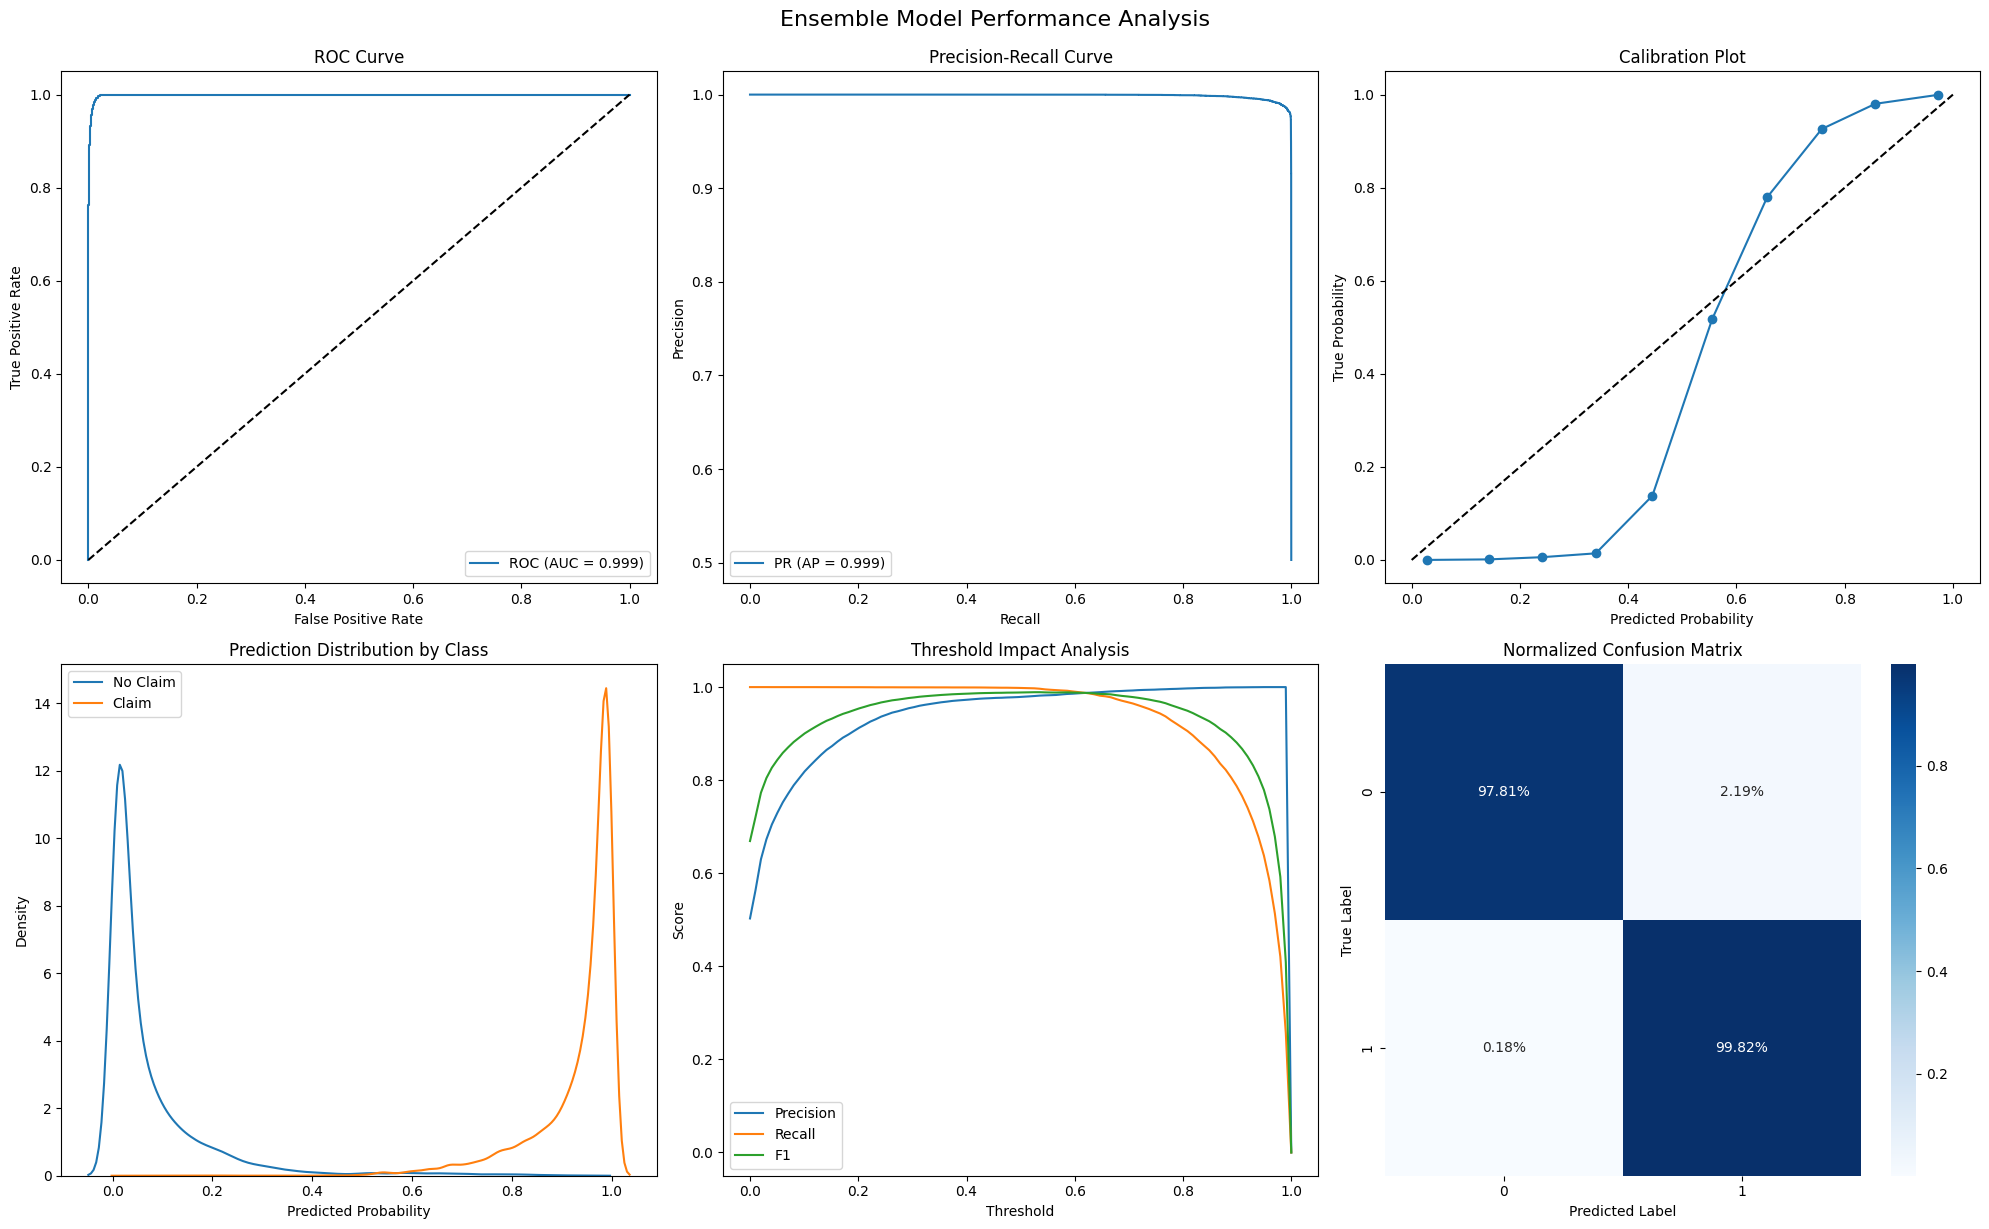

In [16]:
evaluate_all_models(y_test, gb_pred_proba, nn_pred_proba, ensemble_pred_proba)